<center>
<img src="../../img/python_theme.png">
# Майнор "Интеллектуальный анализ данных" 
# Курс "Введение в программирование"
<img src="../../img/faculty_logo.jpg" height="240" width="240">
## Автор материала: старший преподаватель ФКН НИУ ВШЭ Кашницкий Юрий
</center>
Материал распространяется на условиях лицензии <a href="http://www.microsoft.com/en-us/openness/default.aspx#Ms-RL">Ms-RL</a>. Можно использовать в любых целях, но с обязательным упоминанием автора курса и аффилиации.

# <center>Семинар 13. Элементарные задачи на графы. Способы задания графов. Обход в глубину. Обход в ширину
## <center>Алгоритмы на графах

### Кратчайший путь в графе

Заданы n вершин графа (узлов сети) $v_1, v_2, \ldots, v_n$ и положительные целые длины дуг $d_{ij} = d(v_i, v_j)$
между ними. Нужно для всех $k \in \{2, \ldots, n\}$ найти минимальную длину пути из $v_1$ в $v_k$.

Для начала посмотрим, как мы сами могли бы реализовать класс "Неориентированный граф"

In [1]:
class UndirectedGraph:
    def __init__(self):
        self.nodes = set()
        self.edges = {}
        self.distances = {}

    def add_node(self, value):
        self.nodes.add(value)
        self.edges[value] = []
        
    def add_edge(self, from_node, to_node, distance):
        self.edges[from_node].append(to_node)
        self.edges[to_node].append(from_node)
        self.distances[(from_node, to_node)] = distance
        self.distances[(to_node, from_node)] = distance

Алгоритм Дейкстры основывается на том простом факте, что что если у нас есть кратчайший путь от **v** до **w**, проходящий через вершину **y**, назовем его $(v \rightarrow w)^{*}$, то его первая часть от **v** до **y**,
$(v \rightarrow y)^{*}$ тоже будет кратчайшим путем.

<img src="../../img/dijkstra.png">

Задачи с подобными свойствами, когда оптимальное решение можно легко получить из оптимальных решений подзадач, обычно хорошо решаются так называемыми "жадными алгоритмами". Алгоритм Дейкстры – как раз один их примеров. Его сложность при использовании min-кучи – $O(|E| + |V|log|V|)$, где |E|, |V| – число дуг и вершин соответственно.

In [2]:
def dijsktra(graph, initial):
    visited = {initial: 0}
    path = {}

    nodes = graph.nodes

    while nodes: 
        min_node = None
        for node in nodes:
            if node in visited:
                if min_node is None:
                    min_node = node
                elif visited[node] < visited[min_node]:
                    min_node = node

        if min_node is None:
            break

        nodes.remove(min_node)
        current_weight = visited[min_node]

        for edge in G.edges[min_node]:
            weight = current_weight + graph.distances[(min_node, edge)]
            if edge not in visited or weight < visited[edge]:
                visited[edge] = weight
                path[edge] = min_node

    return visited, path

In [3]:
G = UndirectedGraph()

for node in range(1,8):
    G.add_node(node)

for edge in [(1,7,15),(1,3,6),(1,5,7),
            (1,6,6),(1,2,4),(2,4,10),
            (3,5,10),(3,7,5),(3,6,5),
            (4,7,3),(4,5,15),(5,6,5)]:
    G.add_edge(*edge)
    
# print(G.edges)
# print(G.distances)
    
dijsktra(G, 1)

({1: 0, 2: 4, 3: 6, 4: 14, 5: 7, 6: 6, 7: 11},
 {2: 1, 3: 1, 4: 2, 5: 1, 6: 1, 7: 3})

Populating the interactive namespace from numpy and matplotlib


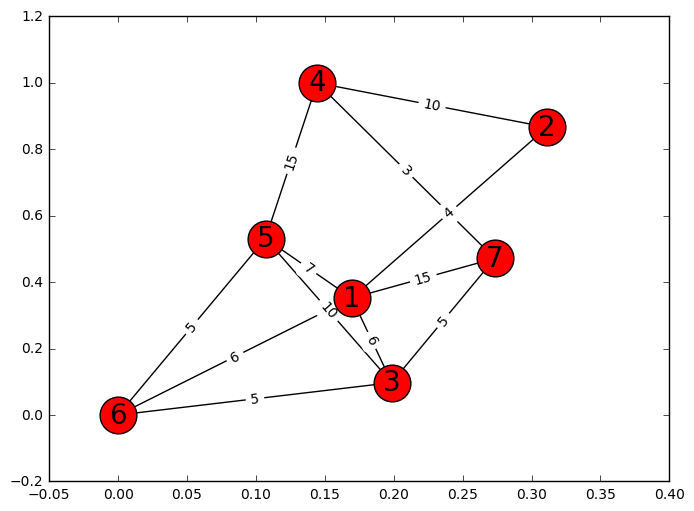

In [1]:
%pylab inline
figsize(8, 6)

import networkx as nx

G=nx.Graph()
G.add_nodes_from(range(1,8))
G.add_weighted_edges_from([(1,7,15),(1,3,6),(1,5,7),
                           (1,6,6),(1,2,4),(2,4,10),
                           (3,5,10),(3,7,5),(3,6,5),
                           (4,7,3),(4,5,15),(5,6,5)])

pos = nx.spring_layout(G) # positions for all nodes

# nodes and node labels
nx.draw_networkx_nodes(G,pos,node_size=700)
nx.draw_networkx_labels(G,pos,font_size=20,font_family='sans-serif')

# edges
edges = [(u,v) for (u,v,d) in G.edges(data=True)]
nx.draw_networkx_edges(G, pos, edgelist=edges, font_size=16)

# edge labels
edge_labels=dict([((u,v,),d['weight'])
             for u,v,d in G.edges(data=True)])
nx.draw_networkx_edge_labels(G,pos,edge_labels=edge_labels)

show() # matplotlib.pyplot.show()

<a href="http://code.activestate.com/recipes/577892-dijkstra-shortest-path-implementation/">Реализация</a> с помощью кучи 

In [5]:
import heapq

def dijkstra(adj, costs, s, t):
    ''' Return predecessors and min distance if there exists a shortest path 
        from s to t; Otherwise, return None '''
    Q = []     # priority queue of items; note item is mutable.
    d = {s: 0} # vertex -> minimal distance
    Qd = {}    # vertex -> [d[v], parent_v, v]
    p = {}     # predecessor
    visited_set = set([s])

    for v in adj.get(s, []):
        d[v] = costs[s, v]
        item = [d[v], s, v]
        heapq.heappush(Q, item)
        Qd[v] = item

    while Q:
#         print(Q)
        cost, parent, u = heapq.heappop(Q)
        if u not in visited_set:
#             print('visit:', u)
            p[u]= parent
            visited_set.add(u)
            if u == t:
                return p, d[u]
            for v in adj.get(u, []):
                if d.get(v):
                    if d[v] > costs[u, v] + d[u]:
                        d[v] =  costs[u, v] + d[u]
                        Qd[v][0] = d[v]    # decrease key
                        Qd[v][1] = u       # update predecessor
                        heapq._siftdown(Q, 0, Q.index(Qd[v]))
                else:
                    d[v] = costs[u, v] + d[u]
                    item = [d[v], u, v]
                    heapq.heappush(Q, item)
                    Qd[v] = item

    return None

def make_undirected(cost):
    ucost = {}
    for k, w in cost.items():
        ucost[k] = w
        ucost[(k[1],k[0])] = w
    return ucost

In [6]:
# adjacent list
adj = { 1: [2, 3, 5, 7],
        2: [1, 4],
        3: [1, 5, 6,7],
        4: [2, 5, 7],
        5: [1, 3, 4, 6],
        6: [3, 5],
        7: [1, 3, 4]}
    
# edge costs
edges = {(1, 2): 4, (4, 7): 3, (1, 3): 6, (4, 5): 15,
        (1, 5): 7, (1, 6): 6, (3, 6): 5, (1, 7): 15, 
        (5, 6): 5, (3, 7): 5, (2, 4): 10, (3, 5): 10}

edge_cost = make_undirected(edges)

source, target = 1, 7
predecessors, min_cost = dijkstra(adj, edge_cost, source, target)
c = target
path = [c]
print('Minimal cost from {0} to {1}: {2}'.format(source, target, min_cost))
while predecessors.get(c):
    path.insert(0, predecessors[c])
    c = predecessors[c]

print('shortest path from {0} to {1}: {2}'.format(source, target, path))

Minimal cost from 1 to 7: 11
shortest path from 1 to 7: [1, 3, 7]


### Нахождение кратчайших путей с помощью методов библиотеки Networkx

In [7]:
help(nx.single_source_dijkstra)

Help on function single_source_dijkstra in module networkx.algorithms.shortest_paths.weighted:

single_source_dijkstra(G, source, target=None, cutoff=None, weight='weight')
    Compute shortest paths and lengths in a weighted graph G.
    
    Uses Dijkstra's algorithm for shortest paths.
    
    Parameters
    ----------
    G : NetworkX graph
    
    source : node label
       Starting node for path
    
    target : node label, optional
       Ending node for path
    
    cutoff : integer or float, optional
       Depth to stop the search. Only paths of length <= cutoff are returned.
    
    Returns
    -------
    distance,path : dictionaries
       Returns a tuple of two dictionaries keyed by node.
       The first dictionary stores distance from the source.
       The second stores the path from the source to that node.
    
    
    Examples
    --------
    >>> G=nx.path_graph(5)
    >>> length,path=nx.single_source_dijkstra(G,0)
    >>> print(length[4])
    4
    >>> print

In [8]:
nx.single_source_dijkstra(G, source=1)

({1: 0, 2: 4, 3: 6, 4: 14, 5: 7, 6: 6, 7: 11},
 {1: [1],
  2: [1, 2],
  3: [1, 3],
  4: [1, 2, 4],
  5: [1, 5],
  6: [1, 6],
  7: [1, 3, 7]})

In [9]:
nx.dijkstra_path(G,1,4)

[1, 2, 4]

Реализация алгоритма Беллмана-Форда. Его сложность $O(|V||E|)$ (хуже, чем у алгоритма Дейкстры), зато можно работать с отрицательными весами.

In [10]:
help(nx.bellman_ford)

Help on function bellman_ford in module networkx.algorithms.shortest_paths.weighted:

bellman_ford(G, source, weight='weight')
    Compute shortest path lengths and predecessors on shortest paths
    in weighted graphs.
    
    The algorithm has a running time of O(mn) where n is the number of
    nodes and m is the number of edges.  It is slower than Dijkstra but
    can handle negative edge weights.
    
    Parameters
    ----------
    G : NetworkX graph
       The algorithm works for all types of graphs, including directed
       graphs and multigraphs.
    
    source: node label
       Starting node for path
    
    weight: string, optional (default='weight')
       Edge data key corresponding to the edge weight
    
    Returns
    -------
    pred, dist : dictionaries
       Returns two dictionaries keyed by node to predecessor in the
       path and to the distance from the source respectively.
    
    Raises
    ------
    NetworkXUnbounded
       If the (di)graph contain

In [11]:
pred, dist = nx.bellman_ford(G, 1)
print(pred)
print(dist)

{1: None, 2: 1, 3: 1, 4: 2, 5: 1, 6: 1, 7: 3}
{1: 0, 2: 4, 3: 6, 4: 14, 5: 7, 6: 6, 7: 11}


### Задача коммивояжера

Заданы неориентированный граф из n вершин-городов, и $d_{ij} = d(v_i, v_j)$ — положительные целые расстояния между городами.
Чему равна наименьшая возможная длина гамильтонова цикла (кольцевого маршрута, проходящего по одному разу через все города)?
То есть нужно найти $$min \sum_{i=1}^{n-1}d_{p_i,p_{i+1}} + d_{p_n,p_1},$$ 
где минимум берется по всем перестановкам p чисел $1, \ldots, n$

In [12]:
from itertools import permutations

INFINITY = pow(10, 20)

def TSP_BruteForce(G, init_node_index):
    def get_path_length(path):
        path_length = 0
        for i, v1 in enumerate(path):
            v2 = path[ (i+1) % len(path)]
            if not G.has_edge(v1, v2):
                return INFINITY
            path_length += G[v1][v2]["weight"]
        return path_length
    
    def node_permutations(G, init_node_index):
        nodes = G.nodes()
        init_node = nodes[init_node_index]
        nodes.remove(init_node)
        return [[init_node] + list(a_tuple) 
                 for a_tuple in permutations(nodes)]
    
    min_path = min_path_length = None
    # перебор всех перестановок с фиксированным первым узлом
    for path in node_permutations(G, init_node_index):
        path_length = get_path_length(path)
        if not min_path or min_path_length > path_length:
            min_path, min_path_length = path, path_length
    return min_path, min_path_length

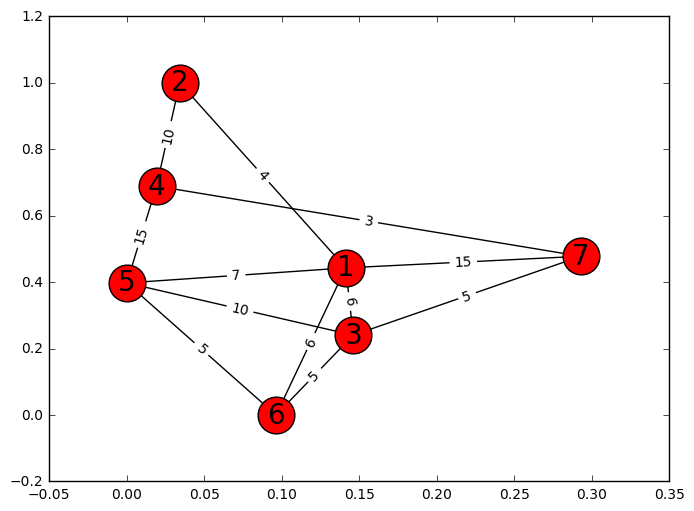

In [13]:
G=nx.Graph()
G.add_nodes_from(range(1,8))
G.add_weighted_edges_from([(1,7,15),(1,3,6),(1,5,7),
                           (1,6,6),(1,2,4),(2,4,10),
                           (3,5,10),(3,7,5),(3,6,5),
                           (4,7,3),(4,5,15),(5,6,5)])

pos = nx.spring_layout(G) # positions for all nodes

# nodes and node labels
nx.draw_networkx_nodes(G,pos,node_size=700)
nx.draw_networkx_labels(G,pos,font_size=20,font_family='sans-serif')

# edges
edges = [(u,v) for (u,v,d) in G.edges(data=True)]
nx.draw_networkx_edges(G, pos, edgelist=edges, font_size=16)

# edge labels
edge_labels=dict([((u,v,),d['weight'])
             for u,v,d in G.edges(data=True)])
nx.draw_networkx_edge_labels(G,pos,edge_labels=edge_labels)

show() # matplotlib.pyplot.show()

Гамильтонов цикл с минимальной суммой весов ребер

In [14]:
"Оптимальный маршрут: {0}. Его стоимость = {1}".format(*TSP_BruteForce(G, 0))

'Оптимальный маршрут: [1, 2, 4, 7, 3, 6, 5]. Его стоимость = 39'

## Поиск в глубину
Поиск в глубину (англ. Depth-first search, DFS) — один из методов обхода графа. Стратегия поиска в глубину, как и следует из названия, состоит в том, чтобы идти "вглубь" графа, насколько это возможно. Алгоритм поиска описывается рекурсивно: перебираем все исходящие из рассматриваемой вершины рёбра. Если ребро ведёт в вершину, которая не была рассмотрена ранее, то запускаем алгоритм от этой нерассмотренной вершины, а после возвращаемся и продолжаем перебирать рёбра. Возврат происходит в том случае, если в рассматриваемой вершине не осталось рёбер, которые ведут в нерассмотренную вершину. Если после завершения алгоритма не все вершины были рассмотрены, то необходимо запустить алгоритм от одной из нерассмотренных вершин.

Рассмотрим на примере следующего неориентированного невзвешенного графа

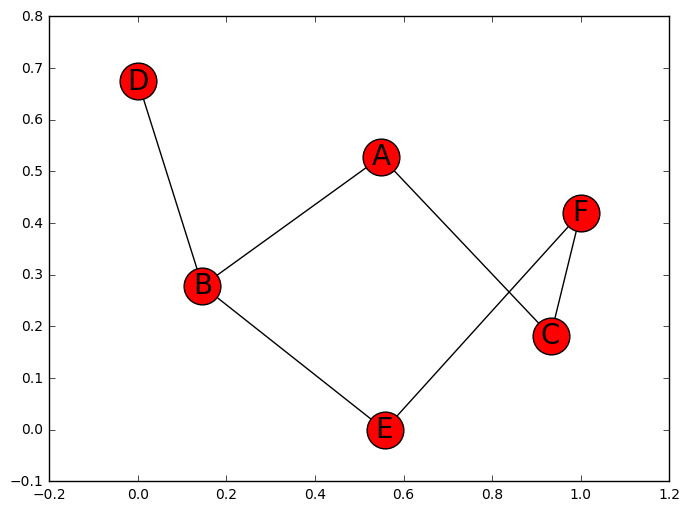

In [15]:
G=nx.Graph()
G.add_nodes_from(['A', 'B', 'C', 'D', 'E', 'F'])
G.add_edges_from([('A','B'),('A','C'),('B','D'),
                    ('B','E'),('C','F'), ('E','F')])

pos = nx.spring_layout(G) # positions for all nodes

# nodes and node labels
nx.draw_networkx_nodes(G, pos, node_size=700)
nx.draw_networkx_labels(G,pos,font_size=20,font_family='sans-serif')

nx.draw_networkx_edges(G, pos, edgelist=G.edges(), font_size=16)

show() # matplotlib.pyplot.show()

In [16]:
def dfs(graph, start, visited=None):
    if visited is None or len(visited) == 0:
        visited = set()
    visited.add(start)
    for next_vertex in set(graph.adj[start].keys()) - visited:
        dfs(graph, next_vertex, visited)
    return visited

In [17]:
dfs(G, 'C')

{'A', 'B', 'C', 'D', 'E', 'F'}

In [18]:
def dfs_paths(graph, start, goal, path=None):
    if path is None:
        path = [start]
    if start == goal:
        yield path
    for next_vertex in set(graph.adj[start].keys()) - set(path):
        yield from dfs_paths(graph, next_vertex, goal, path + [next_vertex])

In [19]:
list(dfs_paths(G, 'C', 'F'))

[['C', 'A', 'B', 'E', 'F'], ['C', 'F']]

## Подсчет числа компонент связности c помощью поиска в глубину

<img src='../../img/disconnected_graph.png'>

- Заводим список посещенных вершин, изначально там везде False
- Для каждой непосещенной вершины запускаем DFS, который обновляет список посещенных вершин
- При каждом запуске DFS увеличиваем число найденных компонент на 1

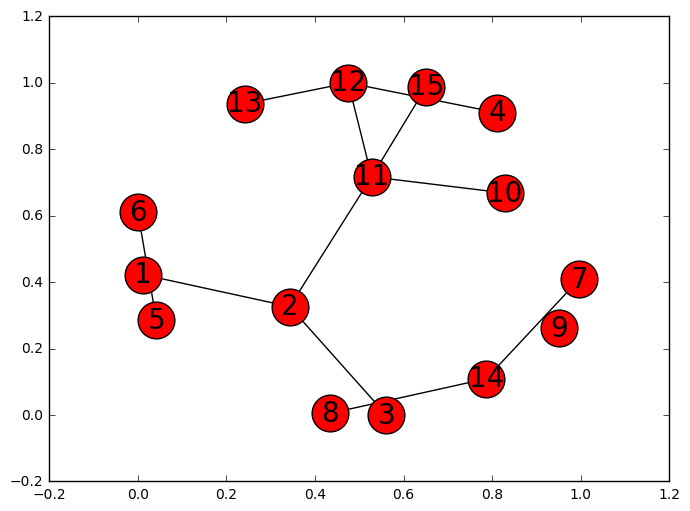

In [27]:
G=nx.Graph()
G.add_nodes_from(list(range(1,15)))
G.add_edges_from([(1, 2), (2, 3), (2, 11), (10, 11), (11, 12), (11, 15), 
                 (12, 4), (12, 13), (7, 14), (8, 14), (5, 6)])

pos = nx.spring_layout(G) # positions for all nodes

# nodes and node labels
nx.draw_networkx_nodes(G, pos, node_size=700)
nx.draw_networkx_labels(G,pos,font_size=20,font_family='sans-serif')

nx.draw_networkx_edges(G, pos, edgelist=G.edges(), font_size=16)

show() # matplotlib.pyplot.show()

In [21]:
def connected_components(nx_graph):
    components = []
    visited = np.array([False] * (len(nx_graph.nodes()) + 1))
    for i in range(1, len(nx_graph.nodes()) + 1):
        if not visited[i]:
            visited_nodes = dfs(nx_graph, i, visited=set(np.where(visited == 1)[0]))
            new_visited_nodes = visited_nodes.difference(set(np.where(visited == 1)[0]))
            components.append(list(new_visited_nodes))
            visited = np.array([i in visited_nodes 
                       for i in range(len(nx_graph.nodes()) + 1)]) + visited
    return components            

In [22]:
connected_components(G)

[[1, 2, 3, 4, 10, 11, 12, 13, 15], [5, 6], [8, 14, 7], [9]]

## Поиск в ширину
Поиск в ширину (англ. breadth-first search, BFS) — метод обхода графа и поиска пути в графе.
Поиск в ширину работает путём последовательного просмотра отдельных уровней графа, начиная с узла-источника $u$.

Рассмотрим все рёбра $(u,v)$, выходящие из узла $u$. Если очередной узел $v$ является целевым узлом, то поиск завершается; в противном случае узел $v$ добавляется в очередь. После того, как будут проверены все рёбра, выходящие из узла $u$, из очереди извлекается следующий узел $u$, и процесс повторяется.

In [23]:
def bfs_paths(graph, start, goal):
    queue = [(start, [start])]
    while queue:
        (vertex, path) = queue.pop(0)
        for next_vertex in set(graph.adj[vertex].keys()) - set(path):
            if next_vertex == goal:
                yield path + [next]
            else:
                queue.append((next, path + [next_vertex]))

In [24]:
list(bfs_paths(G, 'A', 'F'))

KeyError: 'A'

## Ссылки
- Описание алгоритмов <a href="https://ru.wikipedia.org/wiki/%D0%90%D0%BB%D0%B3%D0%BE%D1%80%D0%B8%D1%82%D0%BC_%D0%94%D0%B5%D0%B9%D0%BA%D1%81%D1%82%D1%80%D1%8B">Дейкстры</a>, <a href="https://ru.wikipedia.org/wiki/%D0%90%D0%BB%D0%B3%D0%BE%D1%80%D0%B8%D1%82%D0%BC_%D0%A4%D0%BB%D0%BE%D0%B9%D0%B4%D0%B0_%E2%80%94_%D0%A3%D0%BE%D1%80%D1%88%D0%B5%D0%BB%D0%BB%D0%B0">Флойда-Уоршелла</a> и <a href="https://ru.wikipedia.org/wiki/%D0%90%D0%BB%D0%B3%D0%BE%D1%80%D0%B8%D1%82%D0%BC_%D0%91%D0%B5%D0%BB%D0%BB%D0%BC%D0%B0%D0%BD%D0%B0_%E2%80%94_%D0%A4%D0%BE%D1%80%D0%B4%D0%B0">Беллмана-Форда</a> на Википедии
- <a href="https://class.coursera.org/algo-003/lecture/57">Видео</a> с описанием алгоритма Дейкстры на Coursera
- Алгоритм Прима - <a href="http://neerc.ifmo.ru/wiki/index.php?title=%D0%90%D0%BB%D0%B3%D0%BE%D1%80%D0%B8%D1%82%D0%BC_%D0%9F%D1%80%D0%B8%D0%BC%D0%B0">конспект</a> Университета ИТМО
- <a href="https://yadi.sk/i/cT6ikxLqjVy2r">Книга</a> "Эффективные алгоритмы и сложность вычислений" с примерами на языке Python (Фомин, Кузюрин, 2011)
- Про <a href="https://ru.wikibooks.org/wiki/%D0%A0%D0%B5%D0%B0%D0%BB%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D0%B8_%D0%B0%D0%BB%D0%B3%D0%BE%D1%80%D0%B8%D1%82%D0%BC%D0%BE%D0%B2/%D0%9F%D0%BE%D0%B8%D1%81%D0%BA_%D0%B2_%D0%B3%D0%BB%D1%83%D0%B1%D0%B8%D0%BD%D1%83">поиск в глубину</a> и <a href="https://ru.wikibooks.org/wiki/%D0%A0%D0%B5%D0%B0%D0%BB%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D0%B8_%D0%B0%D0%BB%D0%B3%D0%BE%D1%80%D0%B8%D1%82%D0%BC%D0%BE%D0%B2/%D0%9F%D0%BE%D0%B8%D1%81%D0%BA_%D0%B2_%D1%88%D0%B8%D1%80%D0%B8%D0%BD%D1%83">поиск в ширину</a> на Wikibooks
- Поиск в глубину на <a href="http://habrahabr.ru/post/200074/">Хабрахабре</a> на примере лабиринта 
- Поиск в ширину на <a href="http://habrahabr.ru/post/200252/">Хабрахабре</a>